In [6]:
# prompt: Load My dataset from the URL /content/sample_data/unlabelled_train_data_images.npy

import numpy as np

data = np.load('/content/sample_data/unlabelled_train_data_images.npy')
data.shape

(60000, 1, 28, 28)

In [7]:
# prompt: Remove the extra dimentions, flatten and normalize, apply PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Flatten the images
# Assuming images is a numpy array with shape (num_samples, height, width, channels) or (num_samples, height, width)
# Need to know the actual shape to flatten correctly.
# Let's assume the shape is (num_samples, height, width) for now.
# If it's (num_samples, height, width, channels), you would need to flatten to (num_samples, height * width * channels)

images = data
# Get the original shape to calculate the flattened size
num_samples = images.shape[0]
# Assuming the original shape was (num_samples, height, width)
if len(images.shape) == 3:
  flattened_size = images.shape[1] * images.shape[2]
  images_flattened = images.reshape(num_samples, flattened_size)
# Assuming the original shape was (num_samples, height, width, channels)
elif len(images.shape) == 4:
    flattened_size = images.shape[1] * images.shape[2] * images.shape[3]
    images_flattened = images.reshape(num_samples, flattened_size)
else:
    raise ValueError("Unexpected image shape. Expected 3 or 4 dimensions.")


# Normalize the flattened images
scaler = StandardScaler()
images_normalized = scaler.fit_transform(images_flattened)

# Apply PCA
# You need to decide how many components you want to keep.
# Let's choose a number of components (e.g., 50) or explain variance (e.g., 0.95)
n_components = 10 # Or choose based on explained variance
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images_normalized)

print("Images flattened, normalized, and PCA applied.")
print("Shape of flattened images:", images_flattened.shape)
print("Shape of normalized images:", images_normalized.shape)
print("Shape of PCA reduced images:", images_pca.shape)

Images flattened, normalized, and PCA applied.
Shape of flattened images: (60000, 784)
Shape of normalized images: (60000, 784)
Shape of PCA reduced images: (60000, 50)


In [ ]:
# prompt: Use the PCA reduced data from the previous block to perform  basic feature extraction and K-means on data. Use the code below as a reference
# #Basic Feature Extraction and K-Means on data
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# images = data # Renaming for clarity as the function expects 'images'
# def simple_feature_extraction(images):
#     features = []
#     for img in images:
#         # Extract basic features like mean intensity, variance, etc.
#         features.append([
#             np.mean(img),
#             np.std(img),
#             np.max(img),
#             np.min(img),
#             np.median(img)
#         ])
#     return np.array(features)
# # Process images
# features = simple_feature_extraction(images)
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)
# # Cluster
# kmeans = KMeans(n_clusters=10, random_state=42, n_init=10) # Add n_init for KMeans
# labels = kmeans.fit_predict(features_scaled)
# print("K-Means clustering complete. Cluster labels assigned.")
# print("Shape of features:", features.shape)
# print("Shape of scaled features:", features_scaled.shape)
# print("Shape of labels:", labels.shape)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use the PCA reduced data from the previous block
images = images_pca # Using the result of the previous PCA step

def simple_feature_extraction(images):
    features = []
    # Since the data is already PCA reduced and potentially represents abstract features,
    # basic image features like mean intensity or variance of the original image might not be directly applicable.
    # However, we can treat the PCA components themselves as features and calculate some statistics on them.
    # This is a simplified approach given the context. A more sophisticated approach might involve
    # extracting features from the original images before PCA or using a different feature extraction method.

    # In this case, we'll simply use the PCA components directly for K-Means.
    # If you wanted to extract features *from* the PCA components (which is less common),
    # you could calculate statistics like mean, variance, etc., of the component values for each sample.
    # For this task, we'll directly cluster the PCA components.

    # The function is kept for structure but will effectively return the input PCA data.
    return images

# Process the PCA reduced data (which is already treated as features here)
features = simple_feature_extraction(images)

# Scaling might still be beneficial for K-Means, even after PCA, depending on the scale of the components.
# If the PCA components have very different variances, scaling can help.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Cluster the scaled PCA features
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10) # Add n_init for KMeans
labels = kmeans.fit_predict(features_scaled)

print("K-Means clustering complete on PCA reduced data. Cluster labels assigned.")
print("Shape of features (PCA reduced data):", features.shape)
print("Shape of scaled features (PCA reduced data):", features_scaled.shape)
print("Shape of labels:", labels.shape)

In [4]:
#Basic Feature Extraction and K-Means on data
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

images = images_pca # Renaming for clarity as the function expects 'images'


def simple_feature_extraction(images):
    features = []
    for img in images:
        # Extract basic features like mean intensity, variance, etc.
        features.append([
            np.mean(img),
            np.std(img),
            np.max(img),
            np.min(img),
            np.median(img)
        ])
    return np.array(features)

# Process images
features = simple_feature_extraction(images)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Cluster
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10) # Add n_init for KMeans
labels = kmeans.fit_predict(features_scaled)

print("K-Means clustering complete. Cluster labels assigned.")
print("Shape of features:", features.shape)
print("Shape of scaled features:", features_scaled.shape)
print("Shape of labels:", labels.shape)

K-Means clustering complete. Cluster labels assigned.
Shape of features: (60000, 5)
Shape of scaled features: (60000, 5)
Shape of labels: (60000,)


In [5]:
# prompt: Assign the labelled data to Y_train and the original dataset as X-train
# # Train-test split, use the code snippet below
# X_train, X_val, y_train, y_val = train_test_split(X_pca, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

from sklearn.model_selection import train_test_split

# Y_train is the variable holding the cluster labels
Y_train = labels
# X_train should be the original dataset used for feature extraction,
# in this case, the scaled features used for K-Means clustering.
# X_train_data = features_scaled
X_train_data = images_pca
# Train-test split using the provided snippet structure
# The snippet uses X_pca, but based on the task description, we use the scaled features
# as the input data (X_train_data) and the labels as the target (Y_train).
X_train, X_val, y_train, y_val = train_test_split(X_train_data, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

print("Train-validation split complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Train-validation split complete.
Shape of X_train: (48000, 50)
Shape of X_val: (12000, 50)
Shape of y_train: (48000,)
Shape of y_val: (12000,)


In [ ]:
# prompt: Evaluate my training data with the following classifiers
# # SVC Classifier 1 : kernel = linear
# # SVC Classifier 2 : kernel = rbf
# # Random forest Classifier 1 : min_samples_leaf = 1
# # Random forest Classifier 2 : min_samples_leaf = 3
# # Random forest Classifier 3 : min_samples_leaf = 5
# # Neural Network Classifier 1 = hidden_layer_sizes = (5)
# # Neural Network Classifier 2 = hidden_layer_sizes = (5,5)
# # Neural Network Classifier 3 = hidden_layer_sizes = (5,5,5)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_val, y_train, y_val are already defined from the previous code

# Define the classifiers to evaluate
classifiers = {
    "SVC Linear": SVC(kernel='linear', random_state=42),
    "SVC RBF": SVC(kernel='rbf', random_state=42),
    "Random Forest 1": RandomForestClassifier(min_samples_leaf=1, random_state=42),
    "Random Forest 2": RandomForestClassifier(min_samples_leaf=3, random_state=42),
    "Random Forest 3": RandomForestClassifier(min_samples_leaf=5, random_state=42),
    "Neural Network 1": MLPClassifier(hidden_layer_sizes=(5,), random_state=42, max_iter=200),
    "Neural Network 2": MLPClassifier(hidden_layer_sizes=(5,5,), random_state=42, max_iter=200),
    "Neural Network 3": MLPClassifier(hidden_layer_sizes=(5,5,5,), random_state=42, max_iter=200),
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "report": report
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("-" * 30)

# Print evaluation results
print("\n--- Classifier Evaluation Results ---")
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])
    print("=" * 50)

Training SVC Linear...
SVC Linear Accuracy: 0.7558
------------------------------
Training SVC RBF...
SVC RBF Accuracy: 0.8183
------------------------------
Training Random Forest 1...
Random Forest 1 Accuracy: 0.7788
------------------------------
Training Random Forest 2...
Random Forest 2 Accuracy: 0.7775
------------------------------
Training Random Forest 3...
Random Forest 3 Accuracy: 0.7715
------------------------------
Training Neural Network 1...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network 1 Accuracy: 0.7608
------------------------------
Training Neural Network 2...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network 2 Accuracy: 0.7608
------------------------------
Training Neural Network 3...
Neural Network 3 Accuracy: 0.7622
------------------------------

--- Classifier Evaluation Results ---

Classifier: SVC Linear
Accuracy: 0.7558
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1203
           1       0.77      0.80      0.78      2288
           2       0.81      0.79      0.80       828
           3       0.79      0.80      0.80      2514
           4       0.80      0.75      0.77       212
           5       0.63      0.66      0.65      1243
           6       0.80      0.77      0.78      2936
           7       0.87      0.77      0.82        26
           8       0.79      0.73      0.76       131
           9       0.74      0.77      0.76       619

    accuracy                           0.76     12000
   macro avg       0.77      0.75      0.76     12000
weighted avg       0.76      0.76 

Displaying images from Cluster 0:


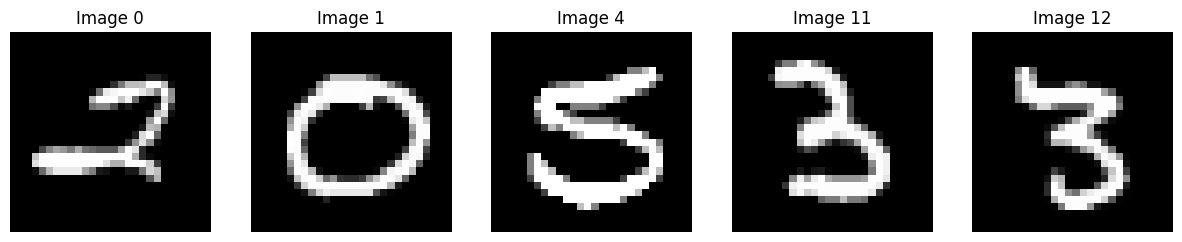

Displaying images from Cluster 1:


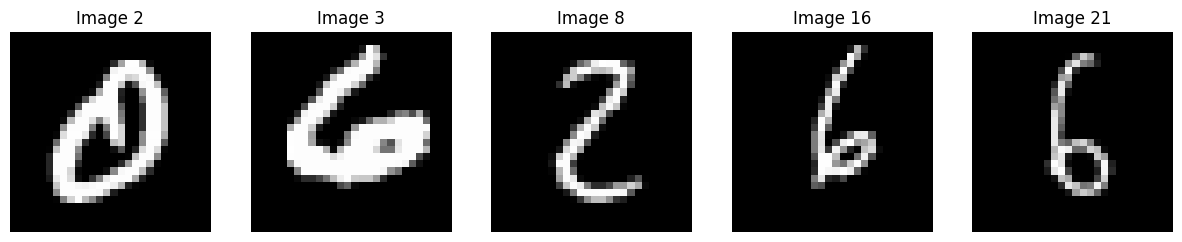

Displaying images from Cluster 2:


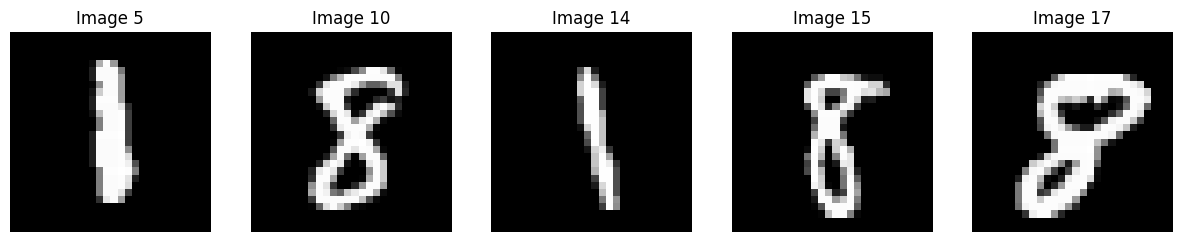

Displaying images from Cluster 3:


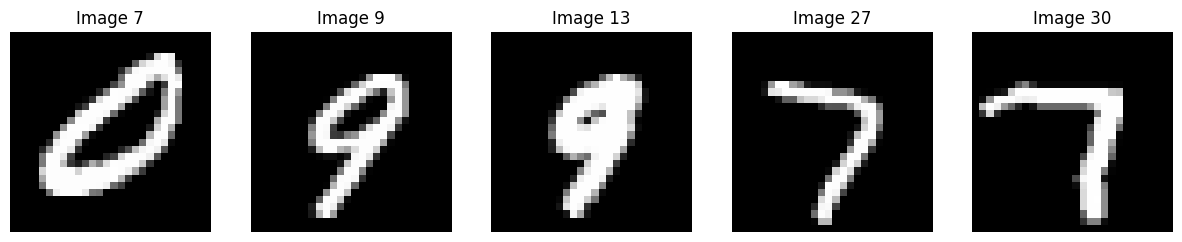

Displaying images from Cluster 4:


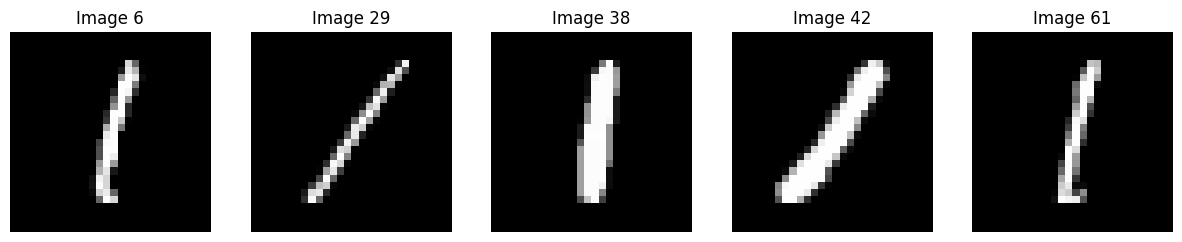

Feature extraction and K-Means clustering completed.
Shape of HOG features: (1000, 144)
Cluster assignments for the first 100 samples: [0 0 1 1 0 2 4 3 1 3 2 0 0 3 2 2 1 2 0 0 2 1 0 0 2 0 0 3 0 4 3 3 0 2 3 3 1
 3 4 0 0 3 4 0 2 2 1 3 2 0 0 1 3 3 3 0 1 0 0 3 3 4 0 3 4 3 1 3 0 3 2 0 2 3
 2 3 0 1 3 1 0 2 0 0 4 3 3 2 1 0 1 2 1 0 0 2 1 3 2 3]


In [9]:
# prompt: HOG Features + K-Means

import numpy as np
# Install the necessary libraries
!pip install scikit-image

# Import necessary libraries
from skimage.feature import hog
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'data' is already loaded as per the previous code
# data = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# Reshape data to (number of images, height, width) if it's not already
if data.ndim == 4:
    data = data.squeeze() # Assuming the shape is (num_images, 1, height, width)

# Example of extracting HOG features from the first few images
num_samples_to_process = 1000 # Process a subset for demonstration
hog_features_list = []

# You might need to adjust the parameters for HOG depending on your image characteristics
# pixels_per_cell and cells_per_block are important for feature granularity
# channel_axis can be None if the image is grayscale
for i in range(min(num_samples_to_process, data.shape[0])):
    # Ensure the image is in the correct format (e.g., uint8) if needed by HOG
    img = data[i]
    # If the image is already grayscale and 2D, you can remove channel_axis
    # If it's color, you might need to process channels or convert to grayscale
    # This example assumes grayscale images
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, feature_vector=True)
    hog_features_list.append(fd)

# Convert the list of features to a numpy array
hog_features = np.array(hog_features_list)

# Perform K-Means clustering
# You need to choose the number of clusters (n_clusters)
# A common way is to use the elbow method, but for demonstration, we pick a number
# n_clusters = 5 # Example: choose 5 clusters

# kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
# kmeans.fit(hog_features)

# # Get the cluster assignments for each sample
# cluster_assignments = kmeans.labels_

# # You can now use the cluster_assignments for further analysis,
# # like visualizing images from each cluster.

# # Example: Display a few images from each cluster
# for cluster_id in range(n_clusters):
#     print(f"Displaying images from Cluster {cluster_id}:")
#     # Get indices of images in this cluster
#     indices = np.where(cluster_assignments == cluster_id)[0]
#     # Display the first few images from this cluster
#     fig, axes = plt.subplots(1, min(5, len(indices)), figsize=(15, 3))
#     axes = axes.flatten()
#     for i, ax in enumerate(axes):
#         if i < len(indices):
#             img_index = indices[i]
#             ax.imshow(data[img_index], cmap='gray') # Assuming grayscale images
#             ax.set_title(f"Image {img_index}")
#             ax.axis('off')
#     plt.show()

# print("Feature extraction and K-Means clustering completed.")
# print(f"Shape of HOG features: {hog_features.shape}")
# print(f"Cluster assignments for the first 100 samples: {cluster_assignments[:100]}")


In [16]:
# Assume hog_features is already computed from the previous HOG extraction step
# hog_features = np.array(hog_features_list)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# It's a good practice to scale features before applying PCA,
# although PCA is less sensitive to feature scaling than some other algorithms.
scaler = StandardScaler()
hog_features_scaled = scaler.fit_transform(hog_features)

# Apply PCA to the scaled HOG features
# You need to decide on the number of components (n_components)
# You can choose a fixed number (e.g., 50, 100) or based on explained variance (e.g., 0.95)
n_components_pca = 100  # Example: choose to keep 100 principal components
pca_hog = PCA(n_components=n_components_pca)

# Fit PCA on the scaled HOG features and transform them
hog_features_pca = pca_hog.fit_transform(hog_features_scaled)

print("PCA applied to HOG features.")
print("Shape of original HOG features:", hog_features.shape)
print("Shape of scaled HOG features:", hog_features_scaled.shape)
print("Shape of PCA reduced HOG features:", hog_features_pca.shape)

# Now you can use hog_features_pca for subsequent steps like K-Means clustering
# Example:
n_clusters = 10
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_pca.fit(hog_features_pca)
cluster_assignments_pca = kmeans_pca.labels_

PCA applied to HOG features.
Shape of original HOG features: (1000, 144)
Shape of scaled HOG features: (1000, 144)
Shape of PCA reduced HOG features: (1000, 100)


Displaying images from Cluster 0:


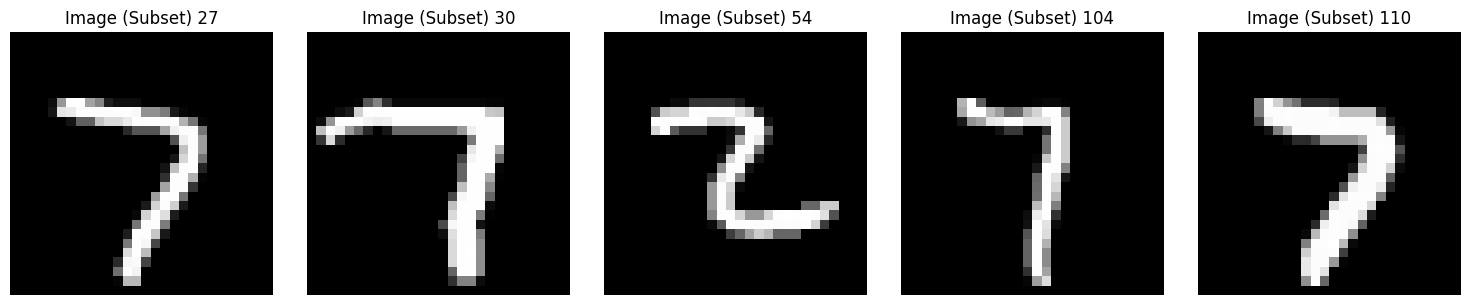

Displaying images from Cluster 1:


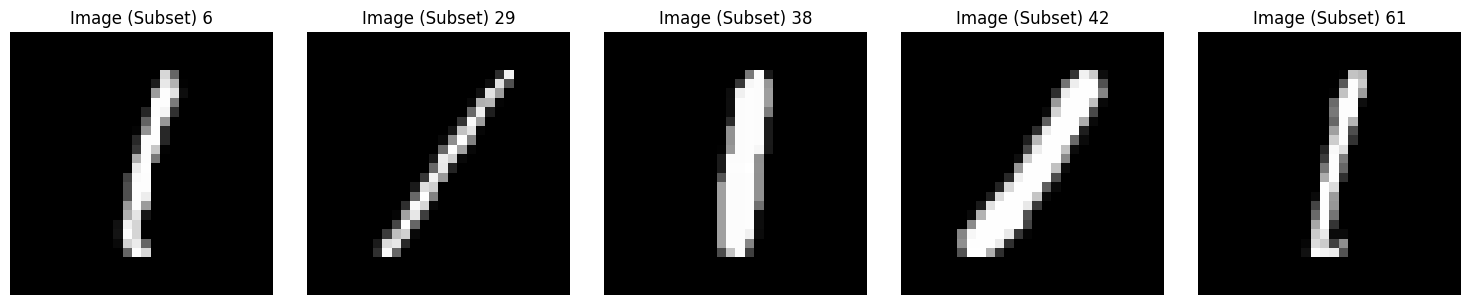

Displaying images from Cluster 2:


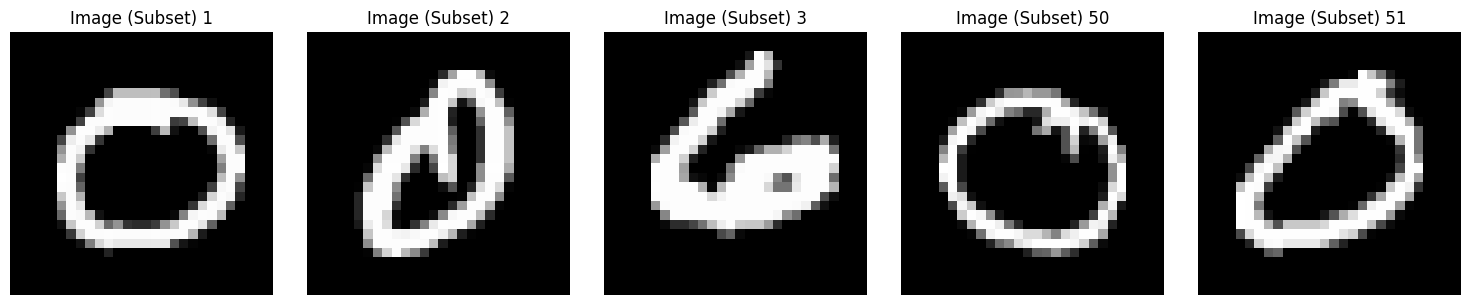

Displaying images from Cluster 3:


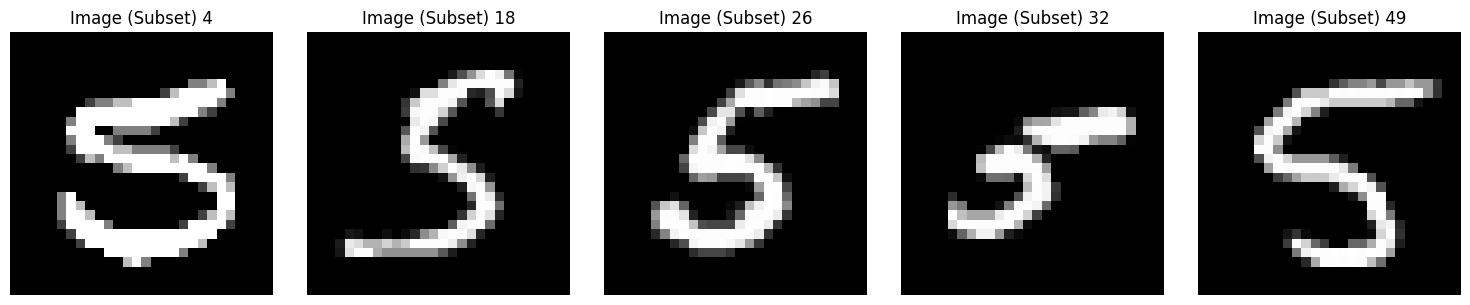

Displaying images from Cluster 4:


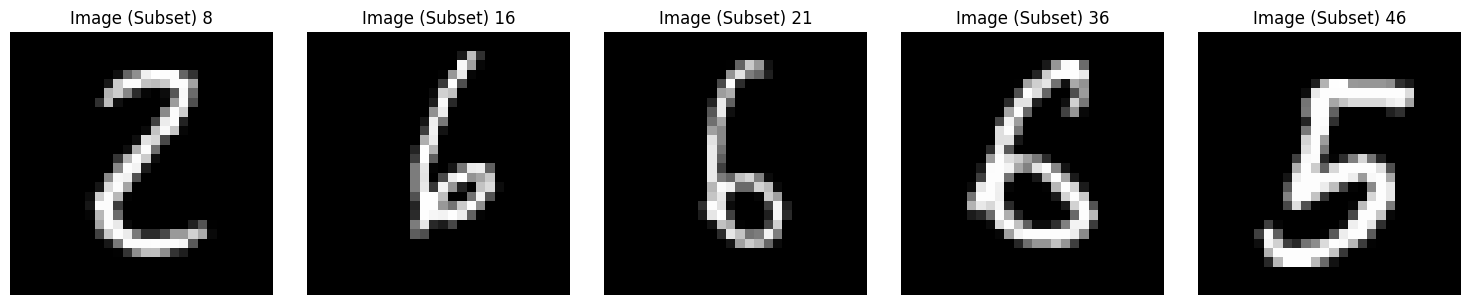

Displaying images from Cluster 5:


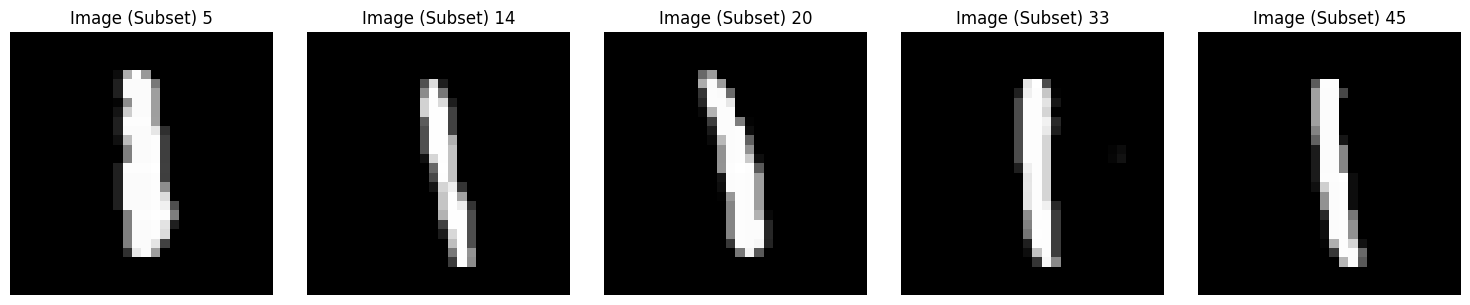

Displaying images from Cluster 6:


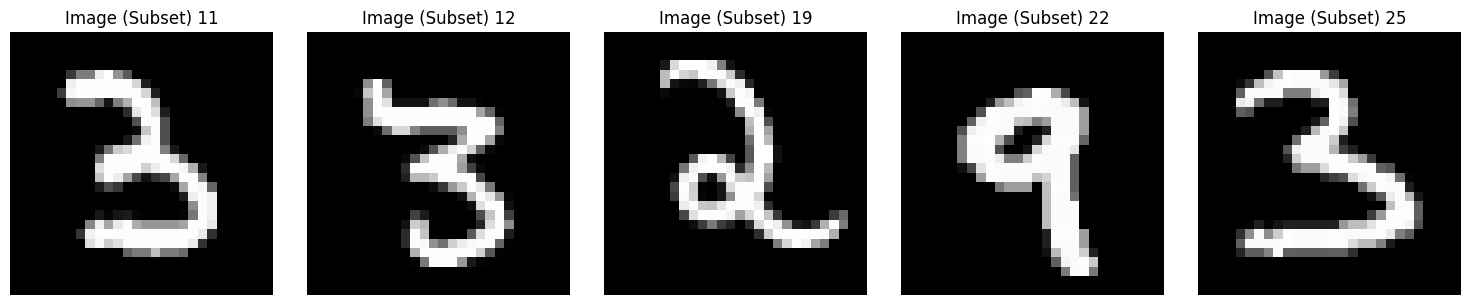

Displaying images from Cluster 7:


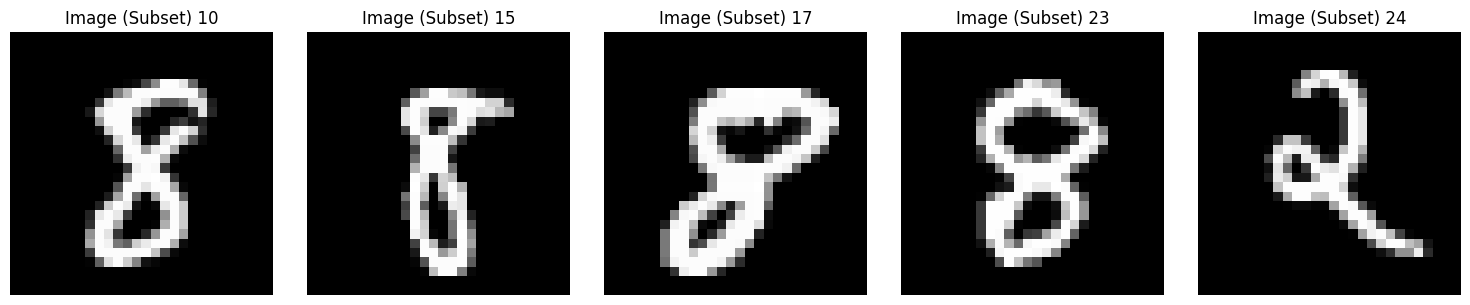

Displaying images from Cluster 8:


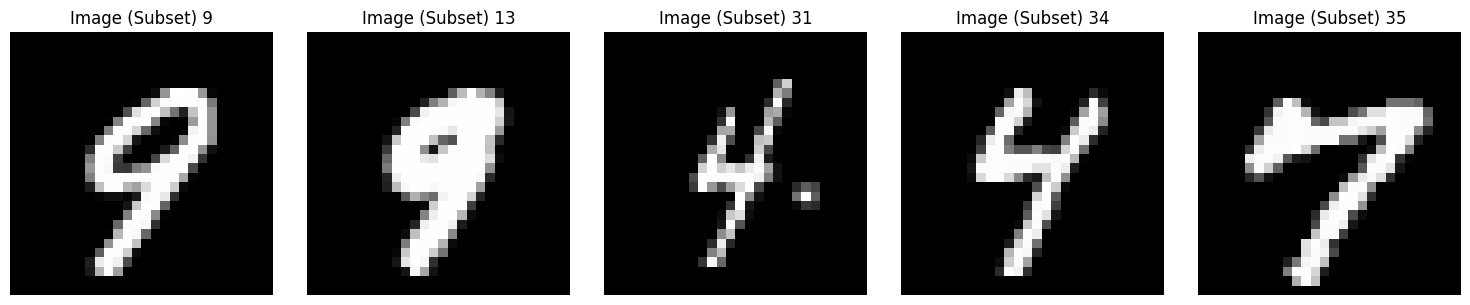

Displaying images from Cluster 9:


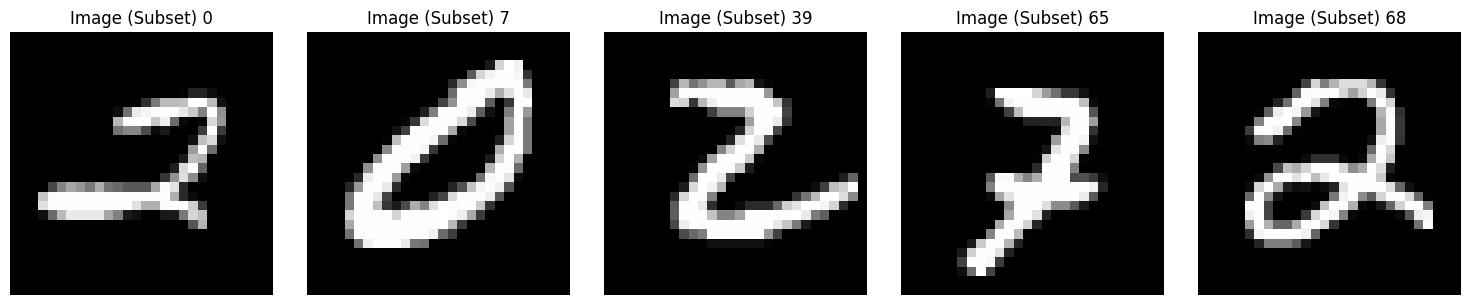

Visualization of images from each cluster (based on PCA reduced HOG features) completed.
Shape of HOG features: (1000, 144)
Cluster assignments for the first 100 samples: [0 0 1 1 0 2 4 3 1 3 2 0 0 3 2 2 1 2 0 0 2 1 0 0 2 0 0 3 0 4 3 3 0 2 3 3 1
 3 4 0 0 3 4 0 2 2 1 3 2 0 0 1 3 3 3 0 1 0 0 3 3 4 0 3 4 3 1 3 0 3 2 0 2 3
 2 3 0 1 3 1 0 2 0 0 4 3 3 2 1 0 1 2 1 0 0 2 1 3 2 3 1 4 3 2 3 2 2 2 3 0 3
 1 4 1 0 1 1 3 0 0 0 3 2 3 4 0 0 2 0 3 3 2 2 1 3 0 0 0 1 3 3 3 3 3 4 3 0 4
 3 3 3 3 3 2 3 3 1 2 0 3 3 1 3 2 0 3 2 1 1 4 2 0 0 3 0 0 1 0 3 2 2 3 1 3 2
 4 0 2 3 4 0 2 0 1 3 4 1 1 2 0 0 1 3 1 1 1 1 1 1 3 4 0 0 2 1 0 3 0 0 1 3 3
 1 0 0 1 0 3 4 1 0 2 1 2 2 1 0 2 2 1 2 0 2 3 1 1 4 1 0 2 0 2 0 2 3 1 2 1 2
 0 0 3 3 0 1 2 3 4 3 0 3 1 0 1 4 2 2 0 2 3 2 0 0 0 1 1 0 0 2 1 0 3 0 1 1 2
 2 4 3 0 0 0 2 3 1 1 4 4 3 2 4 1 1 3 1 3 4 0 0 3 3 0 1 0 2 3 1 0 0 0 0 3 0
 3 2 0 2 3 1 2 1 1 3 0 2 4 3 0 3 1 1 0 2 1 3 0 0 2 1 3 0 3 2 0 2 1 3 3 1 2
 3 1 0 4 0 0 1 0 4 1 4 3 3 3 3 4 2 3 0 0 0 2 0 1 0 1 0 3 0 0 0 3 3 3 3 3 0
 1 0

In [24]:
# prompt: Visualize images from each cluster after K-means clustering in the previous code. Use this sample code as a reference
# # # Example: Display a few images from each cluster
# # for cluster_id in range(n_clusters):
# #     print(f"Displaying images from Cluster {cluster_id}:")
# #     # Get indices of images in this cluster
# #     indices = np.where(cluster_assignments == cluster_id)[0]
# #     # Display the first few images from this cluster
# #     fig, axes = plt.subplots(1, min(5, len(indices)), figsize=(15, 3))
# #     axes = axes.flatten()
# #     for i, ax in enumerate(axes):
# #         if i < len(indices):
# #             img_index = indices[i]
# #             ax.imshow(data[img_index], cmap='gray') # Assuming grayscale images
# #             ax.set_title(f"Image {img_index}")
# #             ax.axis('off')
# #     plt.show()
# # print("Feature extraction and K-Means clustering completed.")
# # print(f"Shape of HOG features: {hog_features.shape}")
# # print(f"Cluster assignments for the first 100 samples: {cluster_assignments[:100]}")

import matplotlib.pyplot as plt
import numpy as np
# Now, use the cluster_assignments_pca to visualize images from each cluster.
# 'data' should contain the original images used for feature extraction.
# Ensure 'data' is loaded and has the correct shape (num_samples, height, width)
# based on the HOG feature extraction step (which was applied to a subset of 'data').

# Assuming data still holds the original images
# Ensure that the number of images in 'data' matches the number of samples
# processed for HOG features and clustering (num_samples_to_process).
# If you processed a subset, make sure to only access that subset of data for visualization.

# The clustering was performed on the first 'num_samples_to_process' images.
# So, we should use the first 'num_samples_to_process' original images for visualization.
data_subset_for_visualization = data[:num_samples_to_process]

# Display a few images from each cluster based on the PCA-reduced HOG features clustering
for cluster_id in range(n_clusters):
    print(f"Displaying images from Cluster {cluster_id}:")
    # Get indices of images in this cluster from the subset processed for HOG
    indices = np.where(cluster_assignments_pca == cluster_id)[0]

    # Display the first few images from this cluster
    # Use the original images from the subset corresponding to these indices
    fig, axes = plt.subplots(1, min(5, len(indices)), figsize=(15, 3))
    # Ensure axes is an array even if there's only one subplot
    if min(5, len(indices)) == 1:
        axes = [axes]
    axes = np.array(axes).flatten()

    for i, ax in enumerate(axes):
        if i < len(indices):
            img_index_in_subset = indices[i]
            # Access the original image from the subset
            original_img = data_subset_for_visualization[img_index_in_subset]
            ax.imshow(original_img, cmap='gray') # Assuming grayscale images
            ax.set_title(f"Image (Subset) {img_index_in_subset}")
            ax.axis('off')
        else:
             ax.axis('off') # Hide empty subplots

    plt.tight_layout()
    plt.show()

print("Visualization of images from each cluster (based on PCA reduced HOG features) completed.")
print(f"Shape of HOG features: {hog_features.shape}")
print(f"Cluster assignments for the first 100 samples: {cluster_assignments[:500]}")


In [18]:
# prompt: Assign the labelled data to Y_train and the original dataset as X-train
# # Train-test split, use the code snippet below
# X_train, X_val, y_train, y_val = train_test_split(X_pca, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

from sklearn.model_selection import train_test_split

# Y_train is the variable holding the cluster labels
Y_train = cluster_assignments_pca
# X_train should be the original dataset used for feature extraction,
# in this case, the scaled features used for K-Means clustering.
X_train_data = hog_features

# Train-test split using the provided snippet structure
# The snippet uses X_pca, but based on the task description, we use the scaled features
# as the input data (X_train_data) and the labels as the target (Y_train).
X_train, X_val, y_train, y_val = train_test_split(X_train_data, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

print("Train-validation split complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Train-validation split complete.
Shape of X_train: (800, 144)
Shape of X_val: (200, 144)
Shape of y_train: (800,)
Shape of y_val: (200,)


In [22]:
# prompt: Evaluate my training data with the following classifiers
# # SVC Classifier 1 : kernel = linear
# # SVC Classifier 2 : kernel = rbf
# # Random forest Classifier 1 : min_samples_leaf = 1
# # Random forest Classifier 2 : min_samples_leaf = 3
# # Random forest Classifier 3 : min_samples_leaf = 5
# # Neural Network Classifier 1 = hidden_layer_sizes = (5)
# # Neural Network Classifier 2 = hidden_layer_sizes = (5,5)
# # Neural Network Classifier 3 = hidden_layer_sizes = (5,5,5)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


# Assuming X_train, X_val, y_train, y_val are already defined from the previous code

# Define the classifiers to evaluate
classifiers = {
    "SVC Linear": SVC(kernel='linear', random_state=42),
    "SVC RBF": SVC(kernel='rbf', random_state=42),
    "Random Forest 1": RandomForestClassifier(min_samples_leaf=1, random_state=42),
    "Random Forest 2": RandomForestClassifier(min_samples_leaf=3, random_state=42),
    "Random Forest 3": RandomForestClassifier(min_samples_leaf=5, random_state=42),
    "Neural Network 1": MLPClassifier(hidden_layer_sizes=(5,), random_state=42, max_iter=200),
    "Neural Network 2": MLPClassifier(hidden_layer_sizes=(5,5,), random_state=42, max_iter=200),
    "Neural Network 3": MLPClassifier(hidden_layer_sizes=(5,5,5,), random_state=42, max_iter=200),
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "report": report
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("-" * 30)

# Print evaluation results and confusion matrices
print("\n--- Classifier Evaluation Results ---")
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])

    print("Confusion Matrix:")
    print(result['confusion_matrix'])

    # Optional: Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("=" * 50)

Training SVC Linear...
SVC Linear Accuracy: 0.9200
------------------------------
Training SVC RBF...
SVC RBF Accuracy: 0.9200
------------------------------
Training Random Forest 1...
Random Forest 1 Accuracy: 0.8650
------------------------------
Training Random Forest 2...
Random Forest 2 Accuracy: 0.8650
------------------------------
Training Random Forest 3...
Random Forest 3 Accuracy: 0.8550
------------------------------
Training Neural Network 1...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network 1 Accuracy: 0.8250
------------------------------
Training Neural Network 2...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

Neural Network 2 Accuracy: 0.7300
------------------------------
Training Neural Network 3...
Neural Network 3 Accuracy: 0.5000
------------------------------

--- Classifier Evaluation Results ---

Classifier: SVC Linear
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        21
           3       0.87      0.93      0.90        14
           4       0.92      0.92      0.92        25
           5       1.00      0.88      0.93         8
           6       0.89      0.84      0.86        19
           7       0.93      0.93      0.93        29
           8       0.88      0.90      0.89        31
           9       0.89      0.96      0.92        25

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.92      0.92 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

KeyError: 'confusion_matrix'

Training SVC Linear...
SVC Linear Accuracy: 0.9200
------------------------------
Training SVC RBF...
SVC RBF Accuracy: 0.9200
------------------------------
Training Random Forest 1...
Random Forest 1 Accuracy: 0.8650
------------------------------
Training Random Forest 2...
Random Forest 2 Accuracy: 0.8650
------------------------------
Training Random Forest 3...
Random Forest 3 Accuracy: 0.8550
------------------------------
Training Neural Network 1...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network 1 Accuracy: 0.8250
------------------------------
Training Neural Network 2...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

Neural Network 2 Accuracy: 0.7300
------------------------------
Training Neural Network 3...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

Neural Network 3 Accuracy: 0.5000
------------------------------

--- Classifier Evaluation Results ---

Classifier: SVC Linear
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        21
           3       0.87      0.93      0.90        14
           4       0.92      0.92      0.92        25
           5       1.00      0.88      0.93         8
           6       0.89      0.84      0.86        19
           7       0.93      0.93      0.93        29
           8       0.88      0.90      0.89        31
           9       0.89      0.96      0.92        25

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix:
[[ 7  0  0  0  0  0  0  0  2  0]
 [ 0 18  0  0  1  0  0

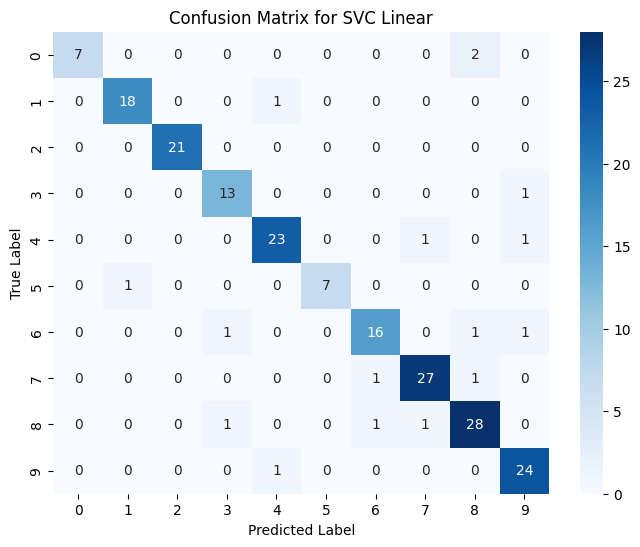


Classifier: SVC RBF
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.95      0.95      0.95        19
           2       0.95      1.00      0.98        21
           3       0.92      0.79      0.85        14
           4       0.96      0.92      0.94        25
           5       1.00      0.88      0.93         8
           6       0.84      0.84      0.84        19
           7       0.96      0.90      0.93        29
           8       0.86      0.97      0.91        31
           9       0.89      1.00      0.94        25

    accuracy                           0.92       200
   macro avg       0.93      0.90      0.91       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix:
[[ 7  0  0  0  0  0  0  0  2  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  1  0  0  1]
 [ 0  0  0  0 23  0  0  1  0  

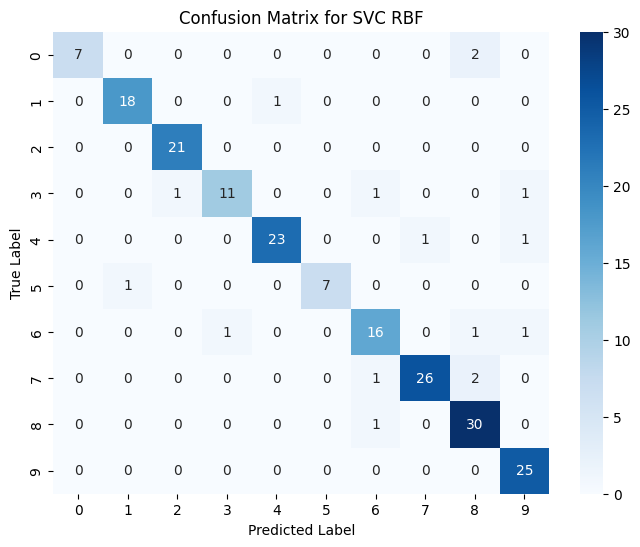


Classifier: Random Forest 1
Accuracy: 0.8650
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.95      0.95      0.95        19
           2       0.95      0.90      0.93        21
           3       0.91      0.71      0.80        14
           4       0.88      0.88      0.88        25
           5       1.00      1.00      1.00         8
           6       0.79      0.79      0.79        19
           7       0.93      0.93      0.93        29
           8       0.82      0.87      0.84        31
           9       0.72      0.84      0.78        25

    accuracy                           0.86       200
   macro avg       0.88      0.85      0.86       200
weighted avg       0.87      0.86      0.87       200

Confusion Matrix:
[[ 6  0  0  0  0  0  1  0  2  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 0  0 19  0  1  0  0  0  0  1]
 [ 0  0  0 10  1  0  1  0  0  2]
 [ 0  0  1  0 22  0  0

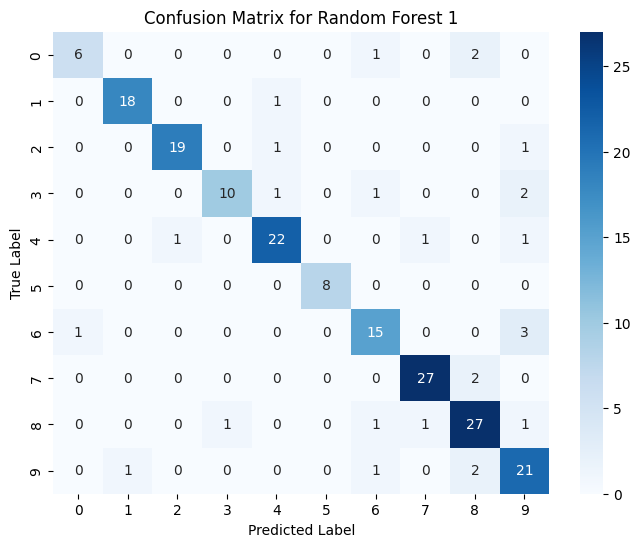


Classifier: Random Forest 2
Accuracy: 0.8650
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       1.00      0.95      0.97        19
           2       0.95      0.90      0.93        21
           3       0.82      0.64      0.72        14
           4       0.88      0.88      0.88        25
           5       1.00      1.00      1.00         8
           6       0.93      0.74      0.82        19
           7       0.93      0.86      0.89        29
           8       0.82      0.90      0.86        31
           9       0.71      0.96      0.81        25

    accuracy                           0.86       200
   macro avg       0.88      0.85      0.86       200
weighted avg       0.87      0.86      0.86       200

Confusion Matrix:
[[ 6  0  0  0  0  0  0  0  2  1]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 0  0 19  0  1  0  0  0  0  1]
 [ 0  0  0  9  1  0  1  0  0  3]
 [ 0  0  1  0 22  0  0

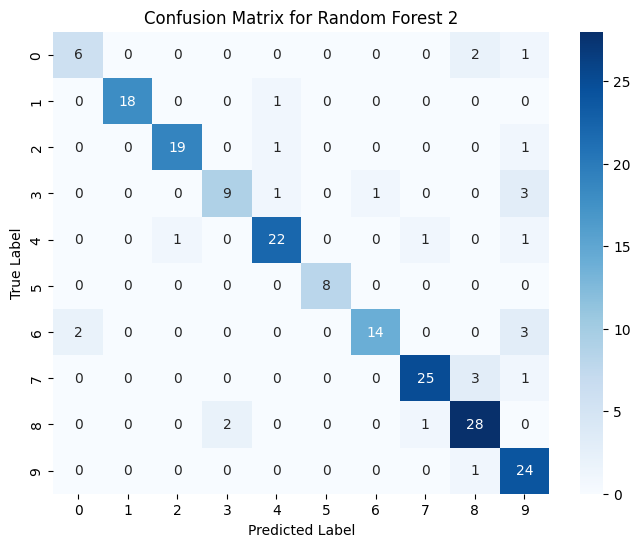


Classifier: Random Forest 3
Accuracy: 0.8550
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       1.00      0.95      0.97        19
           2       0.95      0.90      0.93        21
           3       0.91      0.71      0.80        14
           4       0.88      0.84      0.86        25
           5       1.00      1.00      1.00         8
           6       0.87      0.68      0.76        19
           7       0.87      0.93      0.90        29
           8       0.76      0.84      0.80        31
           9       0.72      0.92      0.81        25

    accuracy                           0.85       200
   macro avg       0.88      0.84      0.86       200
weighted avg       0.86      0.85      0.85       200

Confusion Matrix:
[[ 6  0  0  0  0  0  0  0  2  1]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 0  0 19  0  1  0  0  0  0  1]
 [ 0  0  0 10  1  0  1  0  0  2]
 [ 0  0  1  0 21  0  0

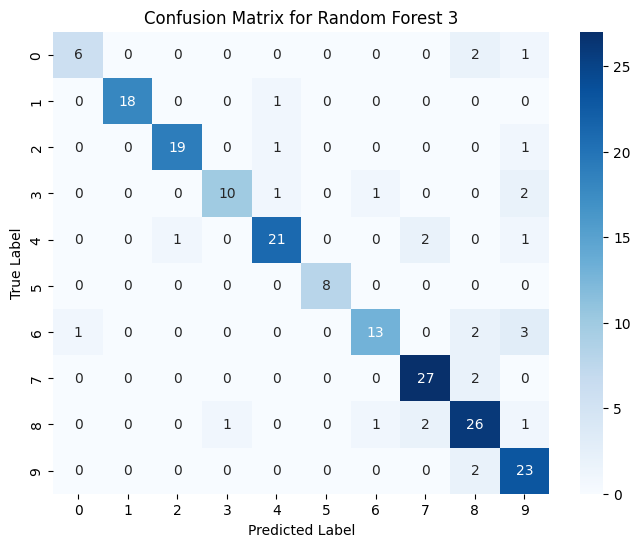


Classifier: Neural Network 1
Accuracy: 0.8250
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.89      0.89      0.89        19
           2       0.73      0.90      0.81        21
           3       0.92      0.79      0.85        14
           4       0.88      0.92      0.90        25
           5       1.00      0.62      0.77         8
           6       0.67      0.53      0.59        19
           7       0.87      0.93      0.90        29
           8       0.88      0.94      0.91        31
           9       0.71      0.80      0.75        25

    accuracy                           0.82       200
   macro avg       0.84      0.78      0.79       200
weighted avg       0.83      0.82      0.82       200

Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  3  2]
 [ 0 17  1  0  1  0  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  1]
 [ 0  0  0 11  1  0  2  0  0  0]
 [ 0  0  2  0 23  0  

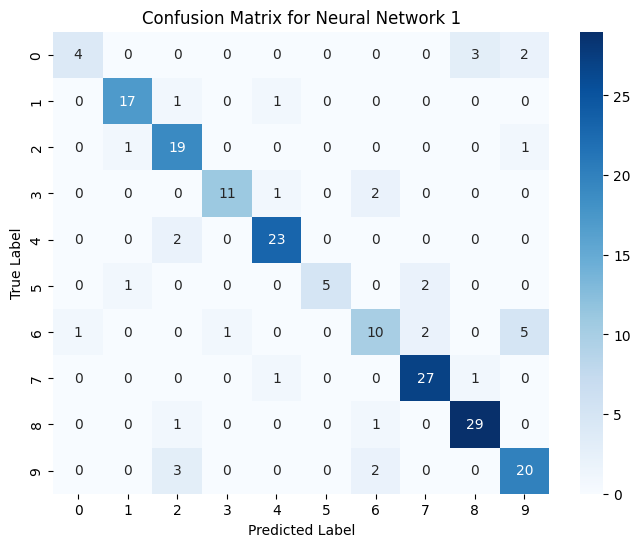


Classifier: Neural Network 2
Accuracy: 0.7300
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.86      0.95      0.90        19
           2       0.77      0.95      0.85        21
           3       0.71      0.71      0.71        14
           4       0.85      0.88      0.86        25
           5       0.56      0.62      0.59         8
           6       0.25      0.11      0.15        19
           7       0.79      0.79      0.79        29
           8       0.74      0.81      0.77        31
           9       0.64      0.84      0.72        25

    accuracy                           0.73       200
   macro avg       0.62      0.67      0.64       200
weighted avg       0.67      0.73      0.70       200

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0  6  2]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  0 20  0  1  0  0  0  0  0]
 [ 0  0  3 10  0  0  0  1  0  0]
 [ 0  0  0  0 22  0  

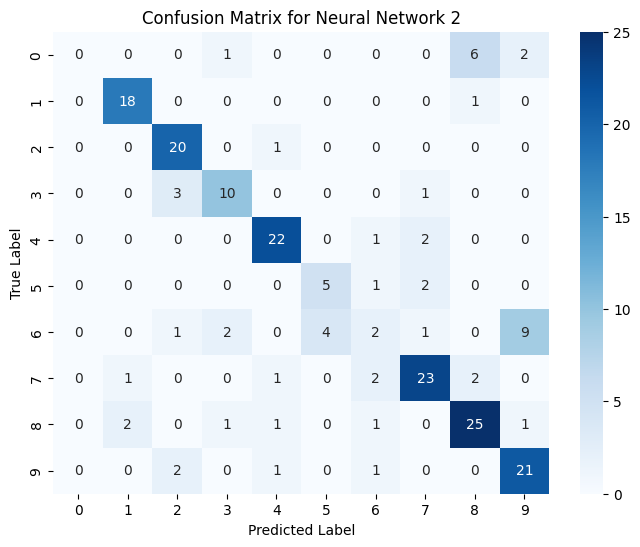


Classifier: Neural Network 3
Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.72      0.95      0.82        19
           2       0.61      0.81      0.69        21
           3       0.00      0.00      0.00        14
           4       0.76      0.76      0.76        25
           5       0.83      0.62      0.71         8
           6       0.00      0.00      0.00        19
           7       0.76      0.86      0.81        29
           8       0.19      0.52      0.28        31
           9       0.00      0.00      0.00        25

    accuracy                           0.50       200
   macro avg       0.39      0.45      0.41       200
weighted avg       0.40      0.50      0.43       200

Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  9  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 0  0 17  0  2  0  0  0  2  0]
 [ 0  0  2  0  0  0  0  0 12  0]
 [ 0  3  0  0 19  0  

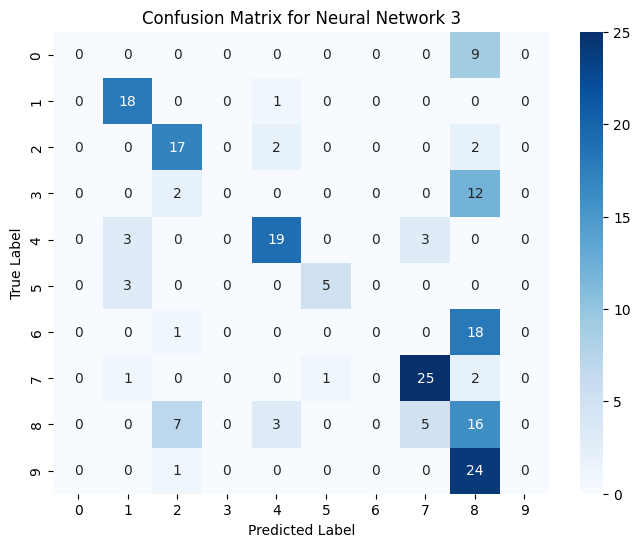

In [20]:
# prompt: Print confusion matrix along with evaluation result
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report
# # Assuming X_train, X_val, y_train, y_val are already defined from the previous code
# # Define the classifiers to evaluate
# classifiers = {
#     "SVC Linear": SVC(kernel='linear', random_state=42),
#     "SVC RBF": SVC(kernel='rbf', random_state=42),
#     "Random Forest 1": RandomForestClassifier(min_samples_leaf=1, random_state=42),
#     "Random Forest 2": RandomForestClassifier(min_samples_leaf=3, random_state=42),
#     "Random Forest 3": RandomForestClassifier(min_samples_leaf=5, random_state=42),
#     "Neural Network 1": MLPClassifier(hidden_layer_sizes=(5,), random_state=42, max_iter=200),
#     "Neural Network 2": MLPClassifier(hidden_layer_sizes=(5,5,), random_state=42, max_iter=200),
#     "Neural Network 3": MLPClassifier(hidden_layer_sizes=(5,5,5,), random_state=42, max_iter=200),
# }
# # Evaluate each classifier
# results = {}
# for name, clf in classifiers.items():
#     print(f"Training {name}...")
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     report = classification_report(y_val, y_pred)
#     results[name] = {
#         "accuracy": accuracy,
#         "report": report
#     }
#     print(f"{name} Accuracy: {accuracy:.4f}")
#     print("-" * 30)
# # Print evaluation results
# print("\n--- Classifier Evaluation Results ---")
# for name, result in results.items():
#     print(f"\nClassifier: {name}")
#     print(f"Accuracy: {result['accuracy']:.4f}")
#     print("Classification Report:")
#     print(result['report'])
#     print("=" * 50)

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code for defining classifiers and evaluation loop) ...

# Evaluate each classifier and print confusion matrix
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    conf_matrix = confusion_matrix(y_val, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": conf_matrix
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("-" * 30)

# Print evaluation results and confusion matrices
print("\n--- Classifier Evaluation Results ---")
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])

    print("Confusion Matrix:")
    print(result['confusion_matrix'])

    # Optional: Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("=" * 50)